### Plots of output generation

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('output_gen/base_results_output_gen.csv')
df

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
0,BosniaH,Liginiteexisting,2020-2025,0.000000,1888.000000,0.732203,0.000000,12109.810233
1,BosniaH,Liginiteexisting,2025-2030,0.000000,1161.846154,0.748865,0.000000,7621.777927
2,BosniaH,Liginiteexisting,2030-2035,0.000000,780.615385,0.740801,0.000000,5065.737113
3,BosniaH,Liginiteexisting,2035-2040,0.000000,544.615385,0.735978,0.000000,3511.227178
4,BosniaH,Liginiteexisting,2040-2045,0.000000,377.600000,0.741356,0.000000,2452.240134
...,...,...,...,...,...,...,...,...
6363,SørvestD,Windoffshorefloating,2035-2040,0.000034,0.000206,0.374741,50.671974,0.000675
6364,SørvestD,Windoffshorefloating,2040-2045,0.000172,0.000378,0.388701,183.694823,0.001286
6365,SørvestD,Windoffshorefloating,2045-2050,0.000176,0.000505,0.367125,128.628685,0.001623
6366,SørvestD,Windoffshorefloating,2050-2055,0.000144,0.000642,0.388546,66.985960,0.002184


#### By generation source

In [190]:
# Hydrogen types handled externally
HYDROGEN_TYPES = ["HydrogenCCGT", "HydrogenOCGT"]

df_gen_source = df.copy()
df_gen_source = df_gen_source[~df_gen_source["GeneratorType"].isin(HYDROGEN_TYPES)]
df_gen_source["genInstalledCap_MW"] = df_gen_source.groupby(['GeneratorType', 'Period'])['genInstalledCap_MW'].transform('sum')
df_gen_source = df_gen_source.drop_duplicates(("GeneratorType", "Period"), ignore_index=True)[["GeneratorType", "Period", "genInstalledCap_MW"]]
df_gen_source

,GeneratorType,Period,genInstalledCap_MW
0,Liginiteexisting,2020-2025,61315.000000
1,Liginiteexisting,2025-2030,37732.307692
2,Liginiteexisting,2030-2035,25351.394231
3,Liginiteexisting,2035-2040,17687.019231
4,Liginiteexisting,2040-2045,12263.000000
...,...,...,...
219,Windoffshorefloating,2035-2040,30.018958
220,Windoffshorefloating,2040-2045,30.028629
221,Windoffshorefloating,2045-2050,0.075863
222,Windoffshorefloating,2050-2055,0.077221


In [191]:
periods = list(df_gen_source["Period"].unique())
periods

['2020-2025',
 '2025-2030',
 '2030-2035',
 '2035-2040',
 '2040-2045',
 '2045-2050',
 '2050-2055',
 '2055-2060']

In [192]:
gen_source_sorted_by_cap = list(df_gen_source[df_gen_source["Period"] == "2055-2060"]\
                              .sort_values(by="genInstalledCap_MW", ascending=False)["GeneratorType"].values)
gen_source_sorted_by_cap

['Lignite',
 'Windonshore',
 'Solar',
 'Coal',
 'GasOCGT',
 'Windoffshoregrounded',
 'Hydroregulated',
 'Hydrorun-of-the-river',
 'GasCCGT',
 'Bio10cofiring',
 'Waste',
 'Wave',
 'Geo',
 'Windoffshorefloating',
 'Bio',
 'Nuclear',
 'Bioexisting',
 'Oilexisting',
 'GasCCSadv',
 'Gasexisting',
 'CoalCCSadv',
 'Coalexisting',
 'Bio10cofiringCCS',
 'LigniteCCSsup',
 'CoalCCS',
 'GasCCS',
 'LigniteCCSadv',
 'Liginiteexisting']

In [193]:
gen_source_displayed = gen_source_sorted_by_cap

installed_caps_gen = []
for gen_source in gen_source_displayed:
    cap_by_period = []
    for period in periods:
        cap_by_period.append(df_gen_source[(df_gen_source["GeneratorType"] == gen_source) & (df_gen_source["Period"] == period)]["genInstalledCap_MW"].values[0])

    # Remove gen_source that have no capacity (1 MW since some threshold)
    if all(c < 1 for c in cap_by_period):
        gen_source_displayed.remove(gen_source)
    else:
        installed_caps_gen.append(cap_by_period)
installed_caps_gen 

[[51453.42578409561,
  153635.64600057874,
  318808.93156794313,
  376171.3377846267,
  523112.82025429496,
  611475.3683467568,
  692676.944674311,
  692676.9446390803],
 [190891.64820867596,
  210606.33853767134,
  260556.70473919736,
  463724.61604093004,
  591664.1812082523,
  621042.6567392112,
  588223.8316093752,
  558234.0177298055],
 [155350.7642698348,
  157471.2002875134,
  233868.82502236095,
  233868.82507759082,
  467641.2592045164,
  389267.49499292887,
  528800.4141507635,
  452402.78987873765],
 [3696.2010161736684,
  99417.93626973731,
  168440.04098104595,
  212497.42674917085,
  233791.2963015484,
  292373.6350131292,
  299769.7654924666,
  299769.7655482862],
 [0.0111124477369768,
  68.52136555597808,
  7158.457361019774,
  56317.58790019322,
  85049.94519778511,
  85049.9469259583,
  128258.97117790778,
  144300.127346062],
 [23904.56258911288,
  23904.56260356223,
  24861.060084806573,
  106050.8100666679,
  119755.44415914029,
  114424.92837926435,
  114895.2845

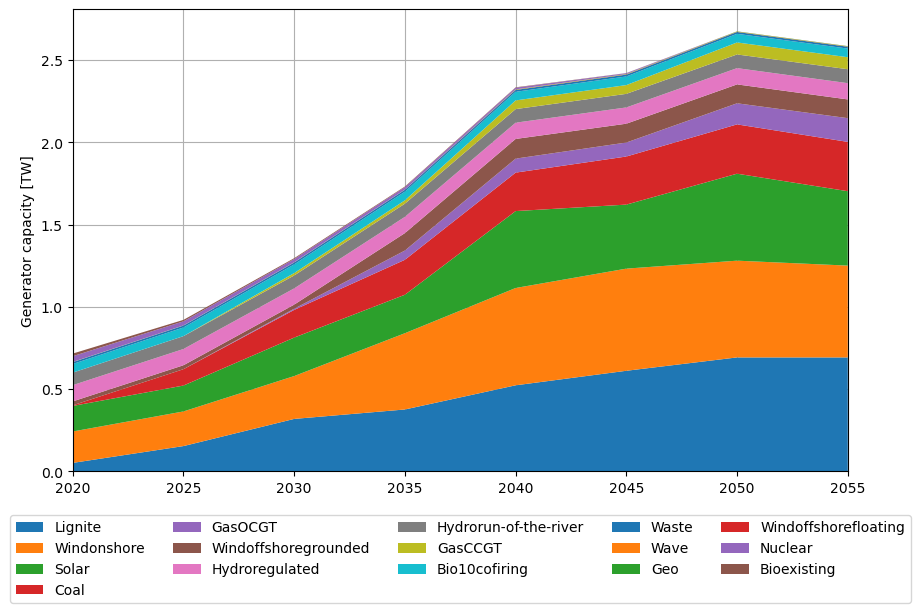

In [194]:
installed_caps_gen_TW = [[cap/1000000 for cap in sublist] for sublist in installed_caps_gen]
period_displayed_gen = [period.split("-")[0] for period in periods]

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid()
plt.stackplot(period_displayed_gen, installed_caps_gen_TW, labels=gen_source_displayed)
plt.ylabel('Generator capacity [TW]')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
plt.margins(x=0)
plt.show()

#### By wind farm nodes (combined floating + grounded tech)

In [195]:
WIND_FARM_NODES = ["Moray Firth","Firth of Forth","Dogger Bank",
                     "Hornsea","Outer Dowsing","Norfolk","East Anglia",
                     "Borssele","Hollandsee Kust","Helgoländer Bucht",
                     "Nordsøen",'Nordvest A', 'Nordvest C', 'Vestavind A', 
                     'Sønnavind A', 'Sørvest C', 'Nordvest B', 'Vestavind F', 
                     'Sørvest E', 'Sørvest A', 'Vestavind B', 'Vestavind C',
                     'Vestavind D', 'Sørvest F', 'Sørvest B', 'Nordavind B', 
                     'Nordavind A', 'Nordavind D', 'Nordavind C', 'Vestavind E', 'Sørvest D']

WIND_FARM_NODES = [node.replace(" ", "") for node in WIND_FARM_NODES]
WIND_FARM_NODES

['MorayFirth',
 'FirthofForth',
 'DoggerBank',
 'Hornsea',
 'OuterDowsing',
 'Norfolk',
 'EastAnglia',
 'Borssele',
 'HollandseeKust',
 'HelgoländerBucht',
 'Nordsøen',
 'NordvestA',
 'NordvestC',
 'VestavindA',
 'SønnavindA',
 'SørvestC',
 'NordvestB',
 'VestavindF',
 'SørvestE',
 'SørvestA',
 'VestavindB',
 'VestavindC',
 'VestavindD',
 'SørvestF',
 'SørvestB',
 'NordavindB',
 'NordavindA',
 'NordavindD',
 'NordavindC',
 'VestavindE',
 'SørvestD']

In [196]:
df_wind_farm_nodes = df[df['Node'].isin(WIND_FARM_NODES)]
df_wind_farm_nodes

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
5872,MorayFirth,Windoffshoregrounded,2020-2025,1.861932e-05,588.000019,0.464548,6.329718e+01,2392.829466
5873,MorayFirth,Windoffshoregrounded,2025-2030,2.779849e-08,588.000019,0.564213,7.404491e-02,2906.192506
5874,MorayFirth,Windoffshoregrounded,2030-2035,1.262169e-06,588.000020,0.433550,1.942393e+00,2233.164696
5875,MorayFirth,Windoffshoregrounded,2035-2040,1.017100e+01,598.171018,0.489367,1.226412e+07,2564.270798
5876,MorayFirth,Windoffshoregrounded,2040-2045,5.951120e-07,598.171017,0.444196,5.289152e-01,2327.576054
...,...,...,...,...,...,...,...,...
6363,SørvestD,Windoffshorefloating,2035-2040,3.438308e-05,0.000206,0.374741,5.067197e+01,0.000675
6364,SørvestD,Windoffshorefloating,2040-2045,1.722377e-04,0.000378,0.388701,1.836948e+02,0.001286
6365,SørvestD,Windoffshorefloating,2045-2050,1.764028e-04,0.000505,0.367125,1.286287e+02,0.001623
6366,SørvestD,Windoffshorefloating,2050-2055,1.439939e-04,0.000642,0.388546,6.698596e+01,0.002184


In [197]:
df_wind_farm_nodes["genInstalledCap_MW"] = df_wind_farm_nodes.groupby(['Node', 'Period'])['genInstalledCap_MW'].transform('sum')
df_wind_farm_nodes = df_wind_farm_nodes.drop_duplicates(("Node", "Period"), ignore_index=True)[["Node", "Period", "genInstalledCap_MW"]]
df_wind_farm_nodes

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_99703/1884539509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_farm_nodes["genInstalledCap_MW"] = df_wind_farm_nodes.groupby(['Node', 'Period'])['genInstalledCap_MW'].transform('sum')


,Node,Period,genInstalledCap_MW
0,MorayFirth,2020-2025,588.000056
1,MorayFirth,2025-2030,588.000071
2,MorayFirth,2030-2035,588.000225
3,MorayFirth,2035-2040,598.171404
4,MorayFirth,2040-2045,598.171405
...,...,...,...
243,SørvestD,2035-2040,0.001138
244,SørvestD,2040-2045,0.014770
245,SørvestD,2045-2050,0.014771
246,SørvestD,2050-2055,0.015111


In [198]:
periods = list(df_wind_farm_nodes["Period"].unique())
periods

['2020-2025',
 '2025-2030',
 '2030-2035',
 '2035-2040',
 '2040-2045',
 '2045-2050',
 '2050-2055',
 '2055-2060']

In [199]:
nodes_sorted_by_cap = list(df_wind_farm_nodes[df_wind_farm_nodes["Period"] == "2055-2060"].sort_values(by="genInstalledCap_MW", ascending=False)["Node"].values)
nodes_sorted_by_cap

['HelgoländerBucht',
 'Nordsøen',
 'MorayFirth',
 'Borssele',
 'HollandseeKust',
 'EastAnglia',
 'SørvestE',
 'OuterDowsing',
 'DoggerBank',
 'Hornsea',
 'SørvestF',
 'Norfolk',
 'FirthofForth',
 'VestavindA',
 'SørvestD',
 'SørvestC',
 'SørvestA',
 'SørvestB',
 'VestavindB',
 'NordvestA',
 'SønnavindA',
 'NordvestB',
 'NordvestC',
 'VestavindC',
 'VestavindD',
 'VestavindE',
 'VestavindF',
 'NordavindC',
 'NordavindA',
 'NordavindD',
 'NordavindB']

In [200]:
nodes_displayed = nodes_sorted_by_cap

installed_caps = []
for node in nodes_displayed:
    cap_by_period = []
    for period in periods:
        cap_by_period.append(df_wind_farm_nodes[(df_wind_farm_nodes["Node"] == node) & (df_wind_farm_nodes["Period"] == period)]["genInstalledCap_MW"].values[0])

    # Remove nodes that have no capacity (1 MW since some threshold)
    if all(c < 1 for c in cap_by_period):
        nodes_displayed.remove(node)
    else:
        installed_caps.append(cap_by_period)
installed_caps 

[[7166.000000864464,
  7166.000004757795,
  7166.000009330619,
  7166.000011195806,
  13186.809465513736,
  11530.51206528108,
  12000.863317328727,
  12000.863298249962],
 [1120.000006753105,
  1120.000009892083,
  2076.489286672267,
  5307.863945012889,
  6290.017243762368,
  6774.728108312622,
  6774.728160278273,
  5818.238919910798],
 [588.0000558810533,
  588.000071052738,
  588.0002248702899,
  598.1714042848424,
  598.171404718107,
  4078.2227158273504,
  4078.2228069945504,
  4078.2225981200936],
 [3739.30000135736,
  3739.3000012975785,
  3739.300002357444,
  4881.916603522482,
  4881.916605477556,
  3869.906470990176,
  3869.906471025644,
  3869.9064713956063],
 [357.00000610411087,
  357.0000061641247,
  357.0000173528351,
  3137.996541663209,
  3336.741647930435,
  2979.7415644522075,
  2979.7415698562245,
  2979.741584111768],
 [2812.300005812813,
  2812.30000588943,
  2812.300007274221,
  3445.050834861412,
  3445.05083983976,
  2812.3000277088167,
  2812.3000295927027,


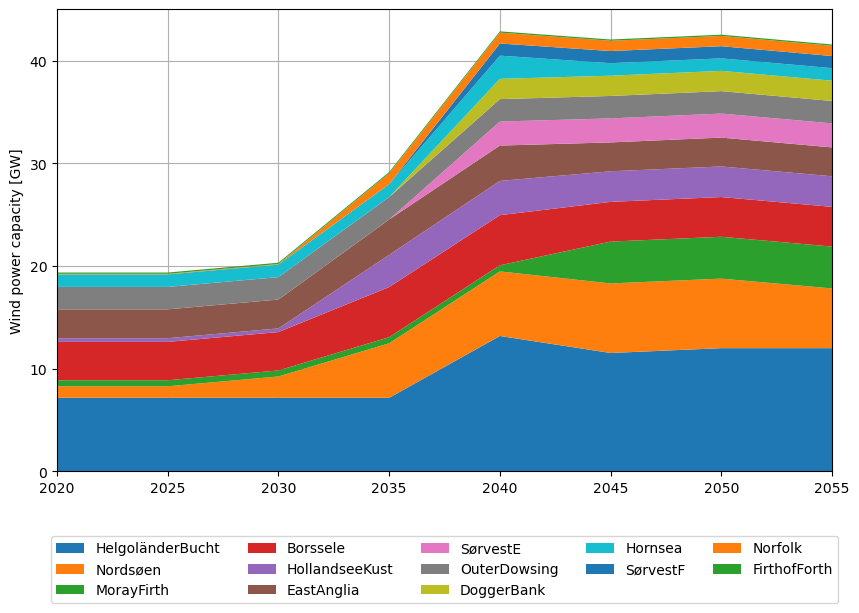

In [201]:
installed_caps_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps]
period_displayed = [period.split("-")[0] for period in periods]

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid()
plt.stackplot(period_displayed, installed_caps_GW, labels=nodes_displayed)
plt.ylabel('Wind power capacity [GW]')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
plt.margins(x=0)
plt.show()
